In [7]:
import networkx as nx
import os
from SimulationHelper import *
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

In [5]:
## Multiprocessing Package - Speed up simulation
from multiprocessing import cpu_count
from dask.distributed import Client, progress
import dask
client = Client(threads_per_worker=8)
client

Client Scheduler: tcp://127.0.0.1:43071 Dashboard: http://127.0.0.1:39467/status,Cluster Workers: 2 Cores: 16 Memory: 33.60 GB


In [8]:
# Parameters
phis = np.arange(0.05, 0.31, 0.05)
phi_fixed = 0.18
names = ["0-5", "5-10", "10-15", "15-20", "0-10", "0-15", "0-20", "Normal", "95-100"]

## Facebook

Influentials analysis for Facebook data.

In [4]:
facebook = nx.read_edgelist("Data/facebook.txt")
print(nx.info(facebook))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [5]:
%%time
pool = []
for phi in tqdm(phis):
    pool.append(dask.delayed(run_simulation)(facebook, phi=phi,  directed=False))

results_facebook = dask.compute(pool)

100%|██████████| 6/6 [00:00<00:00, 2600.85it/s]


CPU times: user 17.8 s, sys: 2.14 s, total: 19.9 s
Wall time: 4min 16s


## Analysis



In [ ]:
## Preload Data
#file_dir = "./Results"
# fb_fn_phi = "facebook_phi.npy"
# fb_fn_q = "facebook_q.npy"
# fb = np.load(os.path.join(file_dir, fb_fn_phi))
# fb_q = np.load(os.path.join(file_dir, fb_fn_q))

In [11]:
fb = np.array(results_facebook[0])

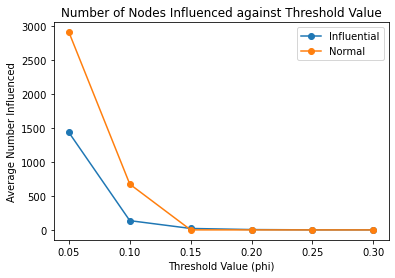

In [11]:
plt.plot(phis, fb[:,0])
plt.plot(phis, fb[:,1])
plt.plot(phis, fb[:,2])
plt.plot(phis, fb[:,3])
plt.plot(phis, fb[:,4])
plt.plot(phis, fb[:,5])
plt.plot(phis, fb[:,6])
plt.plot(phis, fb[:,7])
plt.plot(phis, fb[:,8])
plt.ylabel("Average Number Influenced")
plt.xlabel("Threshold Value (phi)")
plt.title("Number of Nodes Influenced against Threshold Value")
plt.legend(names)

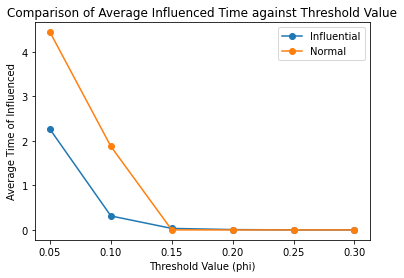

In [12]:
plt.plot(phis, fb[:,9])
plt.plot(phis, fb[:,10])
plt.plot(phis, fb[:,11])
plt.plot(phis, fb[:,12])
plt.plot(phis, fb[:,13])
plt.plot(phis, fb[:,14])
plt.plot(phis, fb[:,15])
plt.plot(phis, fb[:,16])
plt.plot(phis, fb[:,17])
plt.ylabel("Average Time of Influenced")
plt.xlabel("Threshold Value (phi)")
plt.title("Comparison of Average Influenced Time against Threshold Value")
plt.legend(names)

In [20]:
file_dir = "./Results"
fb_fn = "facebook.npy"

if not os.path.exists(file_dir):
    os.makedirs(file_dir)
np.save(os.path.join(file_dir, fb_fn), fb)
